In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
houses= pd.read_csv('../datasets/Housing.csv')
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
houses.shape

(545, 13)

In [5]:
X_train= houses[['area','bedrooms','bathrooms','stories']].to_numpy()
Y_train= houses['price'].to_numpy().reshape(-1, 1)

In [7]:
def compute_cost(X_train, Y_train, W, b):
    m= len(Y_train)
    y_hat= (X_train @ W) + b
    cost= 1/(2*m) * np.sum((y_hat - Y_train)**2)
    return cost

In [8]:
def gradient_descent(X_train, Y_train, W_in, b_in, alpha, epochs):
    W= W_in.copy()
    b= b_in
    cost_hist= []
    m, n= X_train.shape

    for i in range(epochs):
        if i%10 == 0:
            cost_hist.append(compute_cost(X_train, Y_train, W, b))
        res= ((X_train @ W) + b) - Y_train 
        dJ_dW = (1/m)* (X_train.T @ res)
        dJ_db= (1/m) * np.sum(res)

        W= W- alpha* dJ_dW
        b= b- alpha* dJ_db
        
    return W, b, cost_hist
    

In [9]:
def norm(arr):
    mu= np.mean(arr, axis= 0)
    sigma= np.std(arr, axis=0)
    norm= (arr - mu)/ sigma
    return norm, mu, sigma

In [10]:
#normalizing features and target for smooth run
X_norm, x_mean, x_std= norm(X_train)
Y_norm, y_mean, y_std= norm(Y_train)

In [35]:
m, n= X_train.shape
W_in= np.zeros(n).reshape(-1, 1)
b_in= 0
W_norm , b_norm, cost_hist = gradient_descent(X_norm, Y_norm, W_in, b_in, 0.01, 15000)

In [37]:
x_labels= houses[['area','bedrooms','bathrooms','stories']].columns.values

In [36]:
W_norm, b_norm

(array([[0.44091592],
        [0.07824617],
        [0.32241309],
        [0.24654881]]),
 np.float64(3.0533781415599155e-16))

In [38]:
y_pred_norm= (X_norm @ W_norm) + b_norm
y_pred= (y_pred_norm.flatten() * y_std) + y_mean

In [39]:
#comparing results
print(f"Predicted value= {y_pred[0:5]}")
print(f'Actual value= {Y_train[0:5].flatten()}')

Predicted value= [ 7326017.92511889 10843211.50192757  7561389.4722578   6824824.87028826
  5594242.44267015]
Actual value= [13300000 12250000 12250000 12215000 11410000]


In [40]:
error= mean_absolute_percentage_error(Y_train, y_pred)
error

0.21109432397366135

In [41]:
errors= np.abs(((y_pred- Y_train.flatten())/Y_train.flatten()))*100
print(f'Min error= {errors.min()}')
print(f'Max error= {errors.max()}')

Min error= 0.09178193888930562
Max error= 138.94794391811047


In [42]:
# Find worst predictions
worst_idx = np.argmax(errors)
print(f"Worst prediction at index {worst_idx}:")
print(f"Predicted: {y_pred[worst_idx]}")
print(f"Actual: {Y_train[worst_idx]}")
print(f"Features: {X_train[worst_idx]}")

Worst prediction at index 499:
Predicted: 6356015.308221739
Actual: [2660000]
Features: [3630    3    3    2]


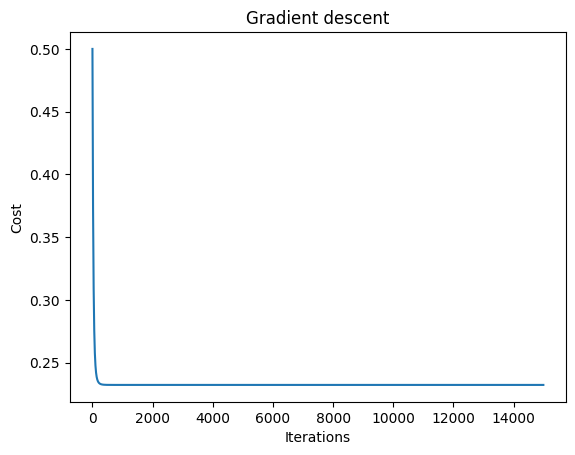

In [43]:
#plotting cost vs iterations
iters= np.arange(0, 15000, 10)
plt.plot(iters, cost_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient descent')
plt.show()

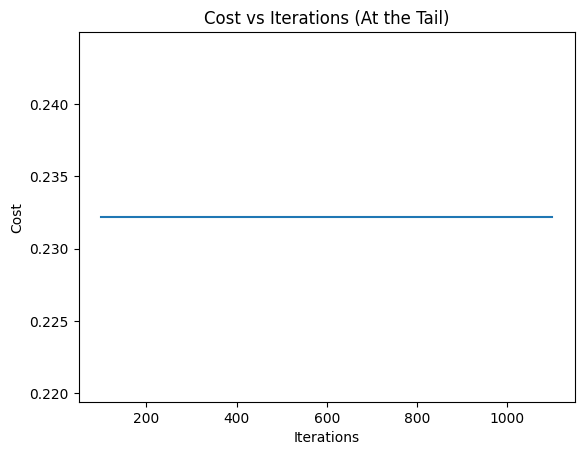

In [44]:
plt.plot(100+ np.arange(len(cost_hist[500:])), cost_hist[500:])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations (At the Tail)')
plt.show()

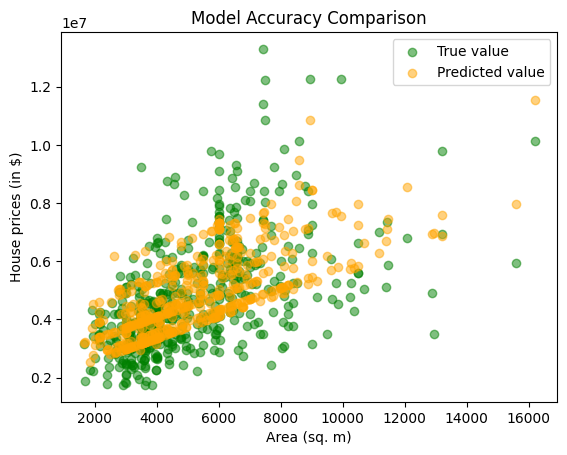

In [45]:
#plot to compare the plots based on just the area
plt.scatter(X_train[:, 0], Y_train, c= 'green', alpha=0.5, label= 'True value')
plt.scatter(X_train[:, 0], y_pred, c='orange', alpha= 0.5, label= 'Predicted value')
plt.xlabel('Area (sq. m)')
plt.ylabel('House prices (in $)')
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()
